# Plot dis1 results of excel got from cluster

In [1]:
import pandas as pd
import geopandas as gpd
from shapely import wkt

In [2]:
city_two_layer_network_edges = pd.read_excel('./city_two_layer_netwrok_edges_0913.xlsx', header=0)

In [3]:
city_two_layer_network_edges['geometry'] = city_two_layer_network_edges['geometry'].apply(wkt.loads)
city_two_layer_network_edges_gdf = gpd.GeoDataFrame(city_two_layer_network_edges.copy())

### scl

In [4]:
scl_df = pd.read_excel('./Dis1_scl_0916.xlsx',header=0)
scl_df.columns = ['id','simple_connectivity_loss']
scl_df = scl_df.drop_duplicates(subset='id').reset_index(drop=True)
scl_df

,id,simple_connectivity_loss
0,2367,0.000000
1,1839,0.000000
2,2172,0.000000
3,2171,0.000000
4,2531,0.000000
...,...,...
2523,1396,0.098358
2524,1593,0.098358
2525,1589,0.098358
2526,1591,0.098358


In [5]:
city_two_layer_network_edges_scl_df = pd.merge(scl_df, city_two_layer_network_edges, on='id',how='right')
# city_two_layer_network_edges_scl_df['geometry'] = city_two_layer_network_edges_scl_df['geometry'].apply(wkt.loads)
city_two_layer_network_edges_scl_gdf = gpd.GeoDataFrame(city_two_layer_network_edges_scl_df.copy(), geometry='geometry')
city_two_layer_network_edges_scl_gdf

,id,simple_connectivity_loss,osm_id,geometry,railway,service,from_id,to_id,distance,time,to_from,from_to,count_weight,route_name_list,route,ref,weights,wcl_weights
0,163,0.0,39271219.0,"LINESTRING (4.83386 52.3646, 4.83387 52.36432)",subway,NaN,147,25,31.352181,0.001254,"(25, 147)","(147, 25)",1.0,Metro 50: Isolatorweg => Gein,subway,"50, 51",31.352181,31.352181
1,16,0.0,23207806.0,"LINESTRING (4.83387 52.36432, 4.83388 52.36379)",subway,NaN,25,23,59.170137,0.002367,"(23, 25)","(25, 23)",1.0,Metro 50: Isolatorweg => Gein,subway,"50, 51",59.170137,59.170137
2,15,0.0,23207802.0,"LINESTRING (4.83388 52.36379, 4.83391 52.36294)",subway,NaN,23,24,93.935464,0.003757,"(24, 23)","(23, 24)",1.0,Metro 50: Isolatorweg => Gein,subway,"50, 51",93.935464,93.935464
3,106,0.0,26983218.0,"LINESTRING (4.83391 52.36294, 4.83392 52.36257)",subway,NaN,24,109,41.168856,0.001647,"(109, 24)","(24, 109)",1.0,Metro 50: Isolatorweg => Gein,subway,"50, 51",41.168856,41.168856
4,114,0.0,26983222.0,"LINESTRING (4.83392 52.36257, 4.83392 52.36247)",subway,NaN,109,588,11.809676,0.000472,"(588, 109)","(109, 588)",1.0,Metro 50: Isolatorweg => Gein,subway,"50, 51",11.809676,11.809676
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2532,3565,0.0,NaN,"LINESTRING (4.90712 52.361, 4.90792 52.36133)",NaN,NaN,2448,138,106.592997,16.500000,"(138, 2448)","(2448, 138)",NaN,NaN,NaN,NaN,6875.000000,6875.000000
2533,3566,0.0,NaN,"LINESTRING (4.90916 52.3614, 4.90785 52.36131)",NaN,NaN,2449,460,146.981525,16.500000,"(460, 2449)","(2449, 460)",NaN,NaN,NaN,NaN,6875.000000,6875.000000
2534,3567,0.0,NaN,"LINESTRING (4.90712 52.361, 4.90785 52.36131)",NaN,NaN,2448,460,98.324093,16.500000,"(460, 2448)","(2448, 460)",NaN,NaN,NaN,NaN,6875.000000,6875.000000
2535,3568,0.0,NaN,"LINESTRING (4.87318 52.34082, 4.87396 52.33932)",NaN,NaN,1068,840,285.700786,16.500000,"(840, 1068)","(1068, 840)",NaN,NaN,NaN,NaN,6875.000000,6875.000000


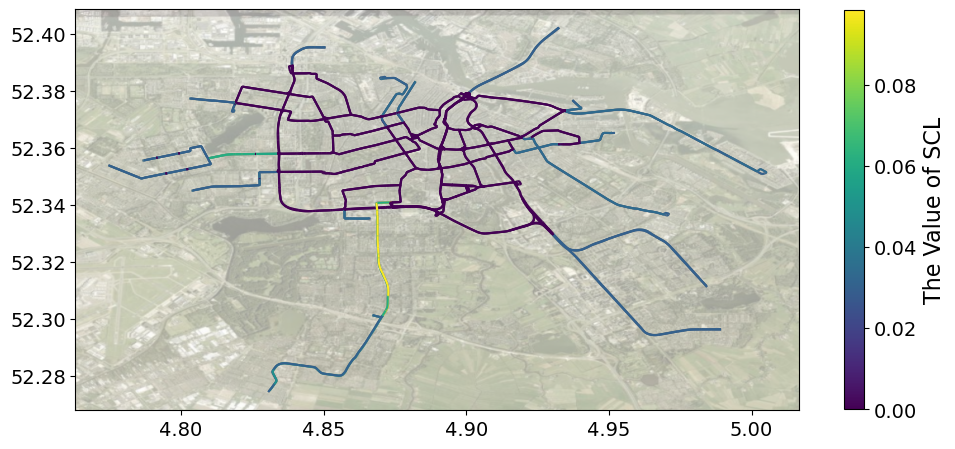

In [6]:
import matplotlib.pyplot as plt
import geopandas as gpd
import contextily as ctx
import matplotlib as mpl
from matplotlib.colors import PowerNorm

# Create a figure and axis object
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

# Plot the base transportation network in grey
city_two_layer_network_edges_gdf.plot(color='grey', ax=ax)

# Plot the edges colored by simple connectivity loss
im = city_two_layer_network_edges_scl_gdf.plot(column='simple_connectivity_loss', ax=ax, legend=False, cmap='viridis')

# Add a basemap using contextily with transparency
metro_lines = gpd.read_file("./Metro lines.GPKG")
ctx.add_basemap(ax=ax, crs=metro_lines.crs.to_string(), source=ctx.providers.Esri.WorldImagery, alpha=0.4, attribution=False)

# Set the font size for the axis tick labels
ax.tick_params(axis='both', which='major', labelsize=14)

# Create the color normalization and colormap
vmin = city_two_layer_network_edges_scl_gdf['simple_connectivity_loss'].min()
vmax = city_two_layer_network_edges_scl_gdf['simple_connectivity_loss'].max()
# norm = mpl.colors.PowerNorm(gamma=0.5, vmin=vmin, vmax=vmax)
norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)
cmap = mpl.cm.viridis

# Create a ScalarMappable object for the colorbar
sm = mpl.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # This is required by the colorbar

# Create a colorbar and adjust its length using the `shrink` parameter
cbar = fig.colorbar(sm, ax=ax, shrink=0.7)
cbar.ax.tick_params(labelsize=14)  # Set the font size for the colorbar ticks

# Add label to the colorbar
cbar.set_label('The Value of SCL', fontsize=16)

# Use tight_layout to automatically adjust the layout to prevent overlapping elements
plt.tight_layout()

# Save the plot
plt.savefig('Edges Colored by Simple Connectivity Loss', bbox_inches='tight', dpi=600)

# Display the plot
plt.show()

### no_links_scl

In [7]:
no_links_scl_df = pd.read_excel('./Dis1_no_links_scl_0916.xlsx',header=0)
no_links_scl_df.columns = ['id','simple_connectivity_loss']
no_links_scl_df = no_links_scl_df.drop_duplicates(subset='id').reset_index(drop=True)
no_links_scl_df

,id,simple_connectivity_loss
0,1044,0.000000
1,2586,0.000000
2,2584,0.000000
3,1473,0.000000
4,2051,0.000000
...,...,...
2295,3098,0.121212
2296,3135,0.121212
2297,3082,0.121212
2298,1441,0.121212


In [8]:
city_two_layer_network_edges_no_links_scl_df = pd.merge(no_links_scl_df, city_two_layer_network_edges, on='id',how='right')
# city_two_layer_network_edges_no_links_scl_df['geometry'] = city_two_layer_network_edges_no_links_scl_df['geometry'].apply(wkt.loads)
city_two_layer_network_edges_no_links_scl_gdf = gpd.GeoDataFrame(city_two_layer_network_edges_no_links_scl_df.copy(), geometry='geometry')
city_two_layer_network_edges_no_links_scl_gdf

,id,simple_connectivity_loss,osm_id,geometry,railway,service,from_id,to_id,distance,time,to_from,from_to,count_weight,route_name_list,route,ref,weights,wcl_weights
0,163,0.030303,39271219.0,"LINESTRING (4.83386 52.3646, 4.83387 52.36432)",subway,NaN,147,25,31.352181,0.001254,"(25, 147)","(147, 25)",1.0,Metro 50: Isolatorweg => Gein,subway,"50, 51",31.352181,31.352181
1,16,0.030303,23207806.0,"LINESTRING (4.83387 52.36432, 4.83388 52.36379)",subway,NaN,25,23,59.170137,0.002367,"(23, 25)","(25, 23)",1.0,Metro 50: Isolatorweg => Gein,subway,"50, 51",59.170137,59.170137
2,15,0.030303,23207802.0,"LINESTRING (4.83388 52.36379, 4.83391 52.36294)",subway,NaN,23,24,93.935464,0.003757,"(24, 23)","(23, 24)",1.0,Metro 50: Isolatorweg => Gein,subway,"50, 51",93.935464,93.935464
3,106,0.030303,26983218.0,"LINESTRING (4.83391 52.36294, 4.83392 52.36257)",subway,NaN,24,109,41.168856,0.001647,"(109, 24)","(24, 109)",1.0,Metro 50: Isolatorweg => Gein,subway,"50, 51",41.168856,41.168856
4,114,0.030303,26983222.0,"LINESTRING (4.83392 52.36257, 4.83392 52.36247)",subway,NaN,109,588,11.809676,0.000472,"(588, 109)","(109, 588)",1.0,Metro 50: Isolatorweg => Gein,subway,"50, 51",11.809676,11.809676
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2532,3565,NaN,NaN,"LINESTRING (4.90712 52.361, 4.90792 52.36133)",NaN,NaN,2448,138,106.592997,16.500000,"(138, 2448)","(2448, 138)",NaN,NaN,NaN,NaN,6875.000000,6875.000000
2533,3566,NaN,NaN,"LINESTRING (4.90916 52.3614, 4.90785 52.36131)",NaN,NaN,2449,460,146.981525,16.500000,"(460, 2449)","(2449, 460)",NaN,NaN,NaN,NaN,6875.000000,6875.000000
2534,3567,NaN,NaN,"LINESTRING (4.90712 52.361, 4.90785 52.36131)",NaN,NaN,2448,460,98.324093,16.500000,"(460, 2448)","(2448, 460)",NaN,NaN,NaN,NaN,6875.000000,6875.000000
2535,3568,NaN,NaN,"LINESTRING (4.87318 52.34082, 4.87396 52.33932)",NaN,NaN,1068,840,285.700786,16.500000,"(840, 1068)","(1068, 840)",NaN,NaN,NaN,NaN,6875.000000,6875.000000


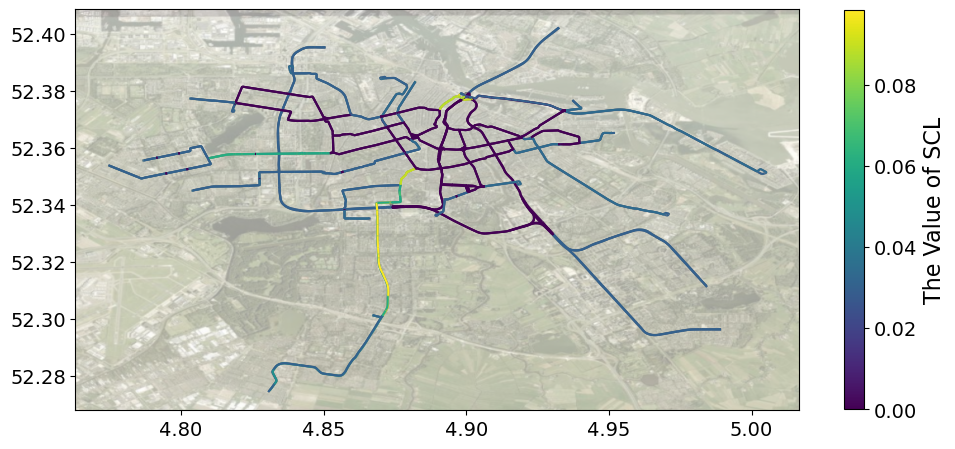

In [9]:
import matplotlib.pyplot as plt
import geopandas as gpd
import contextily as ctx
import matplotlib as mpl

# --- Use vmin and vmax from the first plot to unify the color scale ---
vmin = city_two_layer_network_edges_scl_gdf['simple_connectivity_loss'].min()
vmax = city_two_layer_network_edges_scl_gdf['simple_connectivity_loss'].max()
norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)
cmap = mpl.cm.viridis

# Create the plot and axes
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

# Draw the base network (gray)
city_two_layer_network_edges_gdf.plot(color='grey', ax=ax)

# Draw SCL (no transfer links), using uniform normalization
city_two_layer_network_edges_no_links_scl_gdf.plot(
    column='simple_connectivity_loss',
    ax=ax,
    legend=False,
    cmap=cmap,
    norm=norm
)

# Add basemap
metro_lines = gpd.read_file("./Metro lines.GPKG")
ctx.add_basemap(ax=ax, crs=metro_lines.crs.to_string(),
                source=ctx.providers.Esri.WorldImagery,
                alpha=0.4, attribution=False)

# Set axis scale font size
ax.tick_params(axis='both', which='major', labelsize=14)

# unify colorbar
sm = mpl.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  
cbar = fig.colorbar(sm, ax=ax, shrink=0.7)
cbar.ax.tick_params(labelsize=14)
cbar.set_label('The Value of SCL', fontsize=16)

# Automatically adjust layout
plt.tight_layout()

# Save and display
plt.savefig('Edges Colored by SCL_no_links_unified', bbox_inches='tight', dpi=600)
plt.show()

### wcl

In [10]:
wcl_df = pd.read_excel('./Dis1_dwcl_0916.xlsx',header=0)
wcl_df = wcl_df[['removed_edge_id',	'DWCL_weights']]
wcl_df.columns = ['id','DWCL_weights']
wcl_df = wcl_df.drop_duplicates(subset='id').reset_index(drop=True)
wcl_df

,id,DWCL_weights
0,163,0.004898
1,16,0.004898
2,15,0.004898
3,106,0.004898
4,114,0.004898
...,...,...
2523,3565,0.000077
2524,3566,0.000000
2525,3567,0.000000
2526,3568,0.000000


In [11]:
city_two_layer_network_edges_wcl_df = pd.merge(wcl_df, city_two_layer_network_edges, on='id',how='right')
city_two_layer_network_edges_wcl_gdf = gpd.GeoDataFrame(city_two_layer_network_edges_wcl_df.copy(), geometry='geometry')
city_two_layer_network_edges_wcl_gdf

,id,DWCL_weights,osm_id,geometry,railway,service,from_id,to_id,distance,time,to_from,from_to,count_weight,route_name_list,route,ref,weights,wcl_weights
0,163,0.004898,39271219.0,"LINESTRING (4.83386 52.3646, 4.83387 52.36432)",subway,NaN,147,25,31.352181,0.001254,"(25, 147)","(147, 25)",1.0,Metro 50: Isolatorweg => Gein,subway,"50, 51",31.352181,31.352181
1,16,0.004898,23207806.0,"LINESTRING (4.83387 52.36432, 4.83388 52.36379)",subway,NaN,25,23,59.170137,0.002367,"(23, 25)","(25, 23)",1.0,Metro 50: Isolatorweg => Gein,subway,"50, 51",59.170137,59.170137
2,15,0.004898,23207802.0,"LINESTRING (4.83388 52.36379, 4.83391 52.36294)",subway,NaN,23,24,93.935464,0.003757,"(24, 23)","(23, 24)",1.0,Metro 50: Isolatorweg => Gein,subway,"50, 51",93.935464,93.935464
3,106,0.004898,26983218.0,"LINESTRING (4.83391 52.36294, 4.83392 52.36257)",subway,NaN,24,109,41.168856,0.001647,"(109, 24)","(24, 109)",1.0,Metro 50: Isolatorweg => Gein,subway,"50, 51",41.168856,41.168856
4,114,0.004898,26983222.0,"LINESTRING (4.83392 52.36257, 4.83392 52.36247)",subway,NaN,109,588,11.809676,0.000472,"(588, 109)","(109, 588)",1.0,Metro 50: Isolatorweg => Gein,subway,"50, 51",11.809676,11.809676
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2532,3565,0.000077,NaN,"LINESTRING (4.90712 52.361, 4.90792 52.36133)",NaN,NaN,2448,138,106.592997,16.500000,"(138, 2448)","(2448, 138)",NaN,NaN,NaN,NaN,6875.000000,6875.000000
2533,3566,0.000000,NaN,"LINESTRING (4.90916 52.3614, 4.90785 52.36131)",NaN,NaN,2449,460,146.981525,16.500000,"(460, 2449)","(2449, 460)",NaN,NaN,NaN,NaN,6875.000000,6875.000000
2534,3567,0.000000,NaN,"LINESTRING (4.90712 52.361, 4.90785 52.36131)",NaN,NaN,2448,460,98.324093,16.500000,"(460, 2448)","(2448, 460)",NaN,NaN,NaN,NaN,6875.000000,6875.000000
2535,3568,0.000000,NaN,"LINESTRING (4.87318 52.34082, 4.87396 52.33932)",NaN,NaN,1068,840,285.700786,16.500000,"(840, 1068)","(1068, 840)",NaN,NaN,NaN,NaN,6875.000000,6875.000000


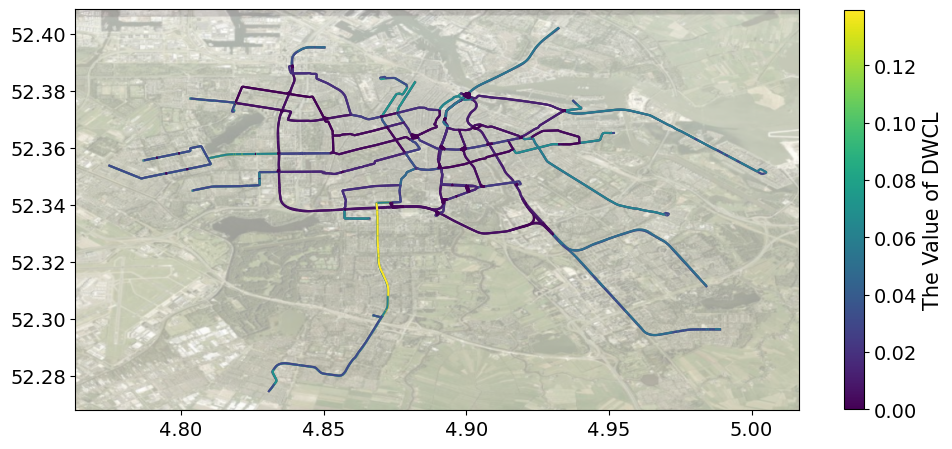

In [12]:
import matplotlib.pyplot as plt
import geopandas as gpd
import contextily as ctx
import matplotlib as mpl

# Create a figure and axis object
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

# Plot the base transportation network in grey
city_two_layer_network_edges_gdf.plot(color='grey', ax=ax)

# Plot the edges colored by simple connectivity loss
im = city_two_layer_network_edges_wcl_gdf.plot(column='DWCL_weights', ax=ax, legend=False, cmap='viridis')

# Add a basemap using contextily with transparency
metro_lines = gpd.read_file("./Metro lines.GPKG")
ctx.add_basemap(ax=ax, crs=metro_lines.crs.to_string(), source=ctx.providers.Esri.WorldImagery, alpha=0.4, attribution=False)

# Set the font size for the axis tick labels
ax.tick_params(axis='both', which='major', labelsize=14)

# Create the color normalization and colormap
vmin = city_two_layer_network_edges_wcl_gdf['DWCL_weights'].min()
# vmax = 0.18 
vmax = city_two_layer_network_edges_wcl_gdf['DWCL_weights'].max()
norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)
cmap = mpl.cm.viridis

# Create a ScalarMappable object for the colorbar
sm = mpl.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # This is required by the colorbar

# Create a colorbar and adjust its length using the `shrink` parameter
cbar = fig.colorbar(sm, ax=ax, shrink=0.7)
cbar.ax.tick_params(labelsize=14)  # Set the font size for the colorbar ticks

# Add label to the colorbar
cbar.set_label('The Value of DWCL', fontsize=15)

# Use tight_layout to automatically adjust the layout to prevent overlapping elements
plt.tight_layout()

# Save the plot
plt.savefig('Edges Colored by Weighted Connectivity Loss', bbox_inches='tight', dpi=600)

# Display the plot
plt.show()

### no_links_wcl

In [13]:
no_links_wcl_df = pd.read_excel('./Dis1_no_links_dwcl_0916.xlsx',header=0)
no_links_wcl_df = no_links_wcl_df[['removed_edge_id',	'DWCL_weights']]
no_links_wcl_df.columns = ['id','DWCL_weights']
no_links_wcl_df = no_links_wcl_df.drop_duplicates(subset='id').reset_index(drop=True)
no_links_wcl_df

,id,DWCL_weights
0,163,0.04824
1,16,0.04824
2,15,0.04824
3,106,0.04824
4,114,0.04824
...,...,...
2295,3337,0.00000
2296,3338,0.00000
2297,3339,0.00000
2298,3340,0.00000


In [14]:
city_two_layer_network_edges_no_links_wcl_df = pd.merge(no_links_wcl_df, city_two_layer_network_edges, on='id',how='right')
city_two_layer_network_edges_no_links_wcl_gdf = gpd.GeoDataFrame(city_two_layer_network_edges_no_links_wcl_df.copy(), geometry='geometry')
city_two_layer_network_edges_no_links_wcl_gdf

,id,DWCL_weights,osm_id,geometry,railway,service,from_id,to_id,distance,time,to_from,from_to,count_weight,route_name_list,route,ref,weights,wcl_weights
0,163,0.04824,39271219.0,"LINESTRING (4.83386 52.3646, 4.83387 52.36432)",subway,NaN,147,25,31.352181,0.001254,"(25, 147)","(147, 25)",1.0,Metro 50: Isolatorweg => Gein,subway,"50, 51",31.352181,31.352181
1,16,0.04824,23207806.0,"LINESTRING (4.83387 52.36432, 4.83388 52.36379)",subway,NaN,25,23,59.170137,0.002367,"(23, 25)","(25, 23)",1.0,Metro 50: Isolatorweg => Gein,subway,"50, 51",59.170137,59.170137
2,15,0.04824,23207802.0,"LINESTRING (4.83388 52.36379, 4.83391 52.36294)",subway,NaN,23,24,93.935464,0.003757,"(24, 23)","(23, 24)",1.0,Metro 50: Isolatorweg => Gein,subway,"50, 51",93.935464,93.935464
3,106,0.04824,26983218.0,"LINESTRING (4.83391 52.36294, 4.83392 52.36257)",subway,NaN,24,109,41.168856,0.001647,"(109, 24)","(24, 109)",1.0,Metro 50: Isolatorweg => Gein,subway,"50, 51",41.168856,41.168856
4,114,0.04824,26983222.0,"LINESTRING (4.83392 52.36257, 4.83392 52.36247)",subway,NaN,109,588,11.809676,0.000472,"(588, 109)","(109, 588)",1.0,Metro 50: Isolatorweg => Gein,subway,"50, 51",11.809676,11.809676
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2532,3565,NaN,NaN,"LINESTRING (4.90712 52.361, 4.90792 52.36133)",NaN,NaN,2448,138,106.592997,16.500000,"(138, 2448)","(2448, 138)",NaN,NaN,NaN,NaN,6875.000000,6875.000000
2533,3566,NaN,NaN,"LINESTRING (4.90916 52.3614, 4.90785 52.36131)",NaN,NaN,2449,460,146.981525,16.500000,"(460, 2449)","(2449, 460)",NaN,NaN,NaN,NaN,6875.000000,6875.000000
2534,3567,NaN,NaN,"LINESTRING (4.90712 52.361, 4.90785 52.36131)",NaN,NaN,2448,460,98.324093,16.500000,"(460, 2448)","(2448, 460)",NaN,NaN,NaN,NaN,6875.000000,6875.000000
2535,3568,NaN,NaN,"LINESTRING (4.87318 52.34082, 4.87396 52.33932)",NaN,NaN,1068,840,285.700786,16.500000,"(840, 1068)","(1068, 840)",NaN,NaN,NaN,NaN,6875.000000,6875.000000


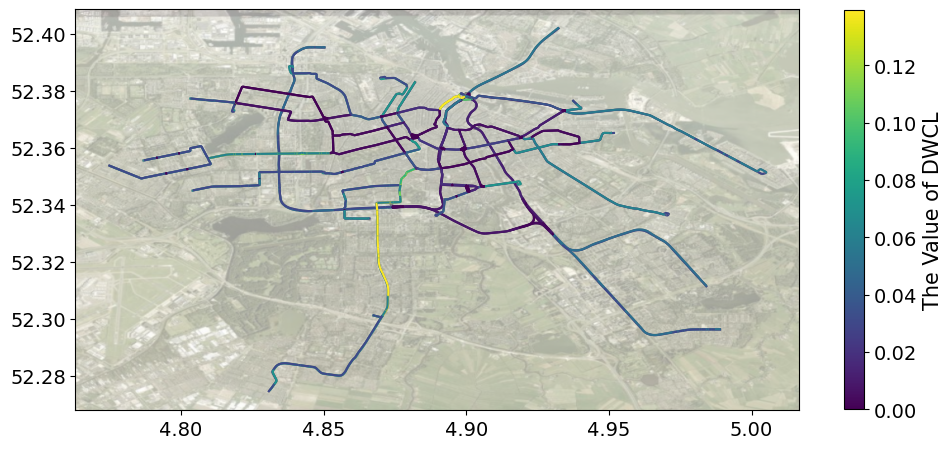

In [15]:
import matplotlib.pyplot as plt
import geopandas as gpd
import contextily as ctx
import matplotlib as mpl

# --- Use vmin and vmax in the third code snippet to unify the color scale ---
vmin = city_two_layer_network_edges_wcl_gdf['DWCL_weights'].min()  
vmax = city_two_layer_network_edges_wcl_gdf['DWCL_weights'].max()  
norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)
cmap = mpl.cm.viridis

# create figure and ax
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

# Draw the base network (gray)
city_two_layer_network_edges_gdf.plot(color='grey', ax=ax)

# Plot the DWCL without transfer links, using uniform normalization
city_two_layer_network_edges_no_links_wcl_gdf.plot(
    column='DWCL_weights',
    ax=ax,
    legend=False,
    cmap=cmap,
    norm=norm
)

# Add basemap
metro_lines = gpd.read_file("./Metro lines.GPKG")
ctx.add_basemap(ax=ax, crs=metro_lines.crs.to_string(),
                source=ctx.providers.Esri.WorldImagery,
                alpha=0.4, attribution=False)

# Set the axis tick font size
ax.tick_params(axis='both', which='major', labelsize=14)

# unify colorbar
sm = mpl.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax, shrink=0.7)
cbar.ax.tick_params(labelsize=14)
cbar.set_label('The Value of DWCL', fontsize=15)

# Automatically adjust layout
plt.tight_layout()

# Save and display
plt.savefig('Edges Colored by Weighted Connectivity Loss_no_links_unified', bbox_inches='tight', dpi=600)
plt.show()